# Import

In [1]:
# base
import numpy as np
import networkx as nx
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink

# viz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs

# feems
from feems.utils import prepare_graph_inputs
from feems import SpatialGraph, Viz
from feems.cross_validation import run_cv
from feems import setup_graph

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"

# Functions

In [2]:
def fit_and_plot_simulation(ax, scenario, sampling_design, rep, alpha, lamb,
                            factr=1e8, draw_cbar=False, obs_node_size=1.0,
                            obs_node_linewidth=.2, cbar_ticklabelsize=12, 
                            cbar_width = "50%", cbar_height = "10%", cbar_loc="center", 
                            cbar_bbox_to_anchor=(0.0, -.8, 1, 1), title_loc="left", 
                            title_pad="-10", title_fontsize=0, abs_max=2):
    print("running: ", scenario, sampling_design, rep)
    
    # read simulation outputs
    genotypes = np.loadtxt("../output/simulations/{}_{}_rep{}/genotypes.txt".format(scenario, sampling_design, rep))
    edges = np.loadtxt("../output/simulations/{}_{}_rep{}/edges.txt".format(scenario, sampling_design, rep))
    grid = np.loadtxt("../output/simulations/{}_{}_rep{}/grid.txt".format(scenario, sampling_design, rep))
    coord = np.loadtxt("../output/simulations/{}_{}_rep{}/coord.txt".format(scenario, sampling_design, rep))

    # filter to common variants
    n = genotypes.shape[0]
    mu = genotypes.sum(axis=0) / (2.0 * n)
    common_var_idx = (mu >= .05) & (mu <= .95)
    genotypes = genotypes[:, common_var_idx]
    print("genotype dimension: ", genotypes.shape)
    
    # setup spatial graph
    sp_graph = SpatialGraph(genotypes, coord, grid, edges, scale_snps=True)    
    sp_graph.fit(lamb=lamb, alpha=alpha, verbose=False)

    # visualize
    v = Viz(ax, sp_graph, projection=None)
    v.obs_node_size = obs_node_size
    v.abs_max = abs_max
    v.obs_node_linewidth = obs_node_linewidth
    v.cbar_ticklabelsize = cbar_ticklabelsize
    v.cbar_width = cbar_width
    v.cbar_height = cbar_height
    v.cbar_loc = cbar_loc
    v.cbar_bbox_to_anchor = cbar_bbox_to_anchor
    if draw_cbar == True:
        v.draw_edge_colorbar()
    v.draw_edges(use_weights=True)
    v.draw_obs_nodes(use_ids=False)
    
    
def get_true_weights(anisotropy_scaler, barrier_w, corridor_w,
                     n_rows=8, n_columns=12, barrier_startpt=2.5, 
                     barrier_endpt=8.5):
    graph, coord, grid, edges = setup_graph(n_rows=n_rows,
                                            n_columns=n_columns,
                                            barrier_startpt=barrier_startpt,
                                            barrier_endpt=barrier_endpt,
                                            anisotropy_scaler=anisotropy_scaler,
                                            barrier_w=barrier_w,
                                            corridor_w=corridor_w)
    W = nx.adjacency_matrix(graph, weight="w")
    idx = nx.adjacency_matrix(graph).nonzero()
    idx = list(np.column_stack(idx))
    true_weights = np.array([])
    for i in range(len(idx)):
        true_weights = np.append(true_weights, W[idx[i][0],idx[i][1]])
    
    return(true_weights)

# Visualize

## Heterogenous 

running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
running:  hetiso missingatrandom 0
genotype dimension:  (72, 11281)
CPU times: user 20 s, sys: 679 ms, total: 20.7 s
Wall time: 20.8 s


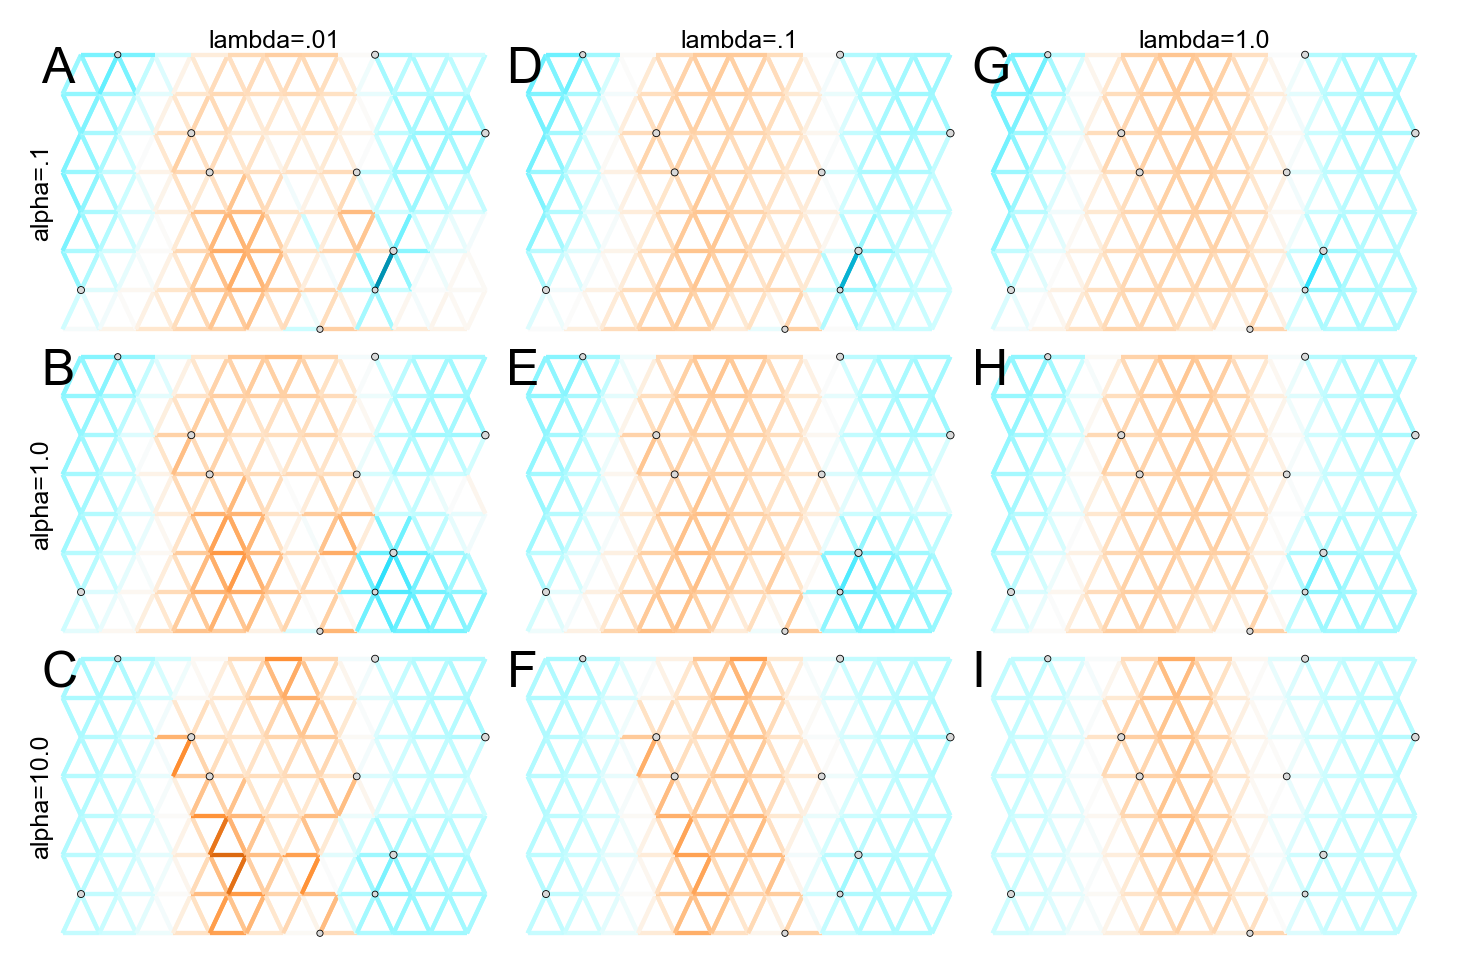

In [32]:
%%time
title_loc = "left"
title_pad = "-10"
title_fontsize = 12

# setup figure
fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(
    ncols=3, nrows=3, figure=fig, wspace=0.0, hspace=0.0
)

rep = 0

ax_00 = fig.add_subplot(spec[0, 0])
ax_00.set_title("A", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_00.text(.5, 1.0, "lambda=.01", horizontalalignment="center", verticalalignment="center", transform=ax_00.transAxes, fontsize=6)
ax_00.text(0, .5, "alpha=.1", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_00.transAxes, fontsize=6)
fit_and_plot_simulation(ax_00, "hetiso", "missingatrandom", rep, .1, .01)

ax_01 = fig.add_subplot(spec[0, 1])
ax_01.set_title("D", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_01.text(.5, 1.0, "lambda=.1", horizontalalignment="center", verticalalignment="center", transform=ax_01.transAxes, fontsize=6)
fit_and_plot_simulation(ax_01, "hetiso", "missingatrandom", rep, .1, .1)

ax_02 = fig.add_subplot(spec[0, 2])
ax_02.set_title("G", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_02.text(.5, 1.0, "lambda=1.0", horizontalalignment="center", verticalalignment="center", transform=ax_02.transAxes, fontsize=6)
fit_and_plot_simulation(ax_02, "hetiso", "missingatrandom", rep, .1, 1.)

ax_10 = fig.add_subplot(spec[1, 0])
ax_10.set_title("B", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_10.text(0, .5, "alpha=1.0", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_10.transAxes, fontsize=6)
fit_and_plot_simulation(ax_10, "hetiso", "missingatrandom", rep, 1., .01)

ax_11 = fig.add_subplot(spec[1, 1])
ax_11.set_title("E", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_11, "hetiso", "missingatrandom", rep, 1., .1)

ax_12 = fig.add_subplot(spec[1, 2])
ax_12.set_title("H", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_12, "hetiso", "missingatrandom", rep, 1., 1.)

ax_20 = fig.add_subplot(spec[2, 0])
ax_20.set_title("C", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_20.text(0, .5, "alpha=10.0", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_20.transAxes, fontsize=6)
fit_and_plot_simulation(ax_20, "hetiso", "missingatrandom", rep, 10., .01)

ax_21 = fig.add_subplot(spec[2, 1])
ax_21.set_title("F", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_21, "hetiso", "missingatrandom", rep, 10., .1)

ax_22 = fig.add_subplot(spec[2, 2])
ax_22.set_title("I", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_22, "hetiso", "missingatrandom", rep, 10., 1.)

In [33]:
fig.savefig(
    "../output/figures/supp-figure-3-alpha-lambda-sim-het.pdf", bbox_inches="tight"
)

## Anisotropy

running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
running:  ibdaniso missingatrandom 0
genotype dimension:  (184, 8367)
CPU times: user 26.4 s, sys: 1.58 s, total: 28 s
Wall time: 28.1 s


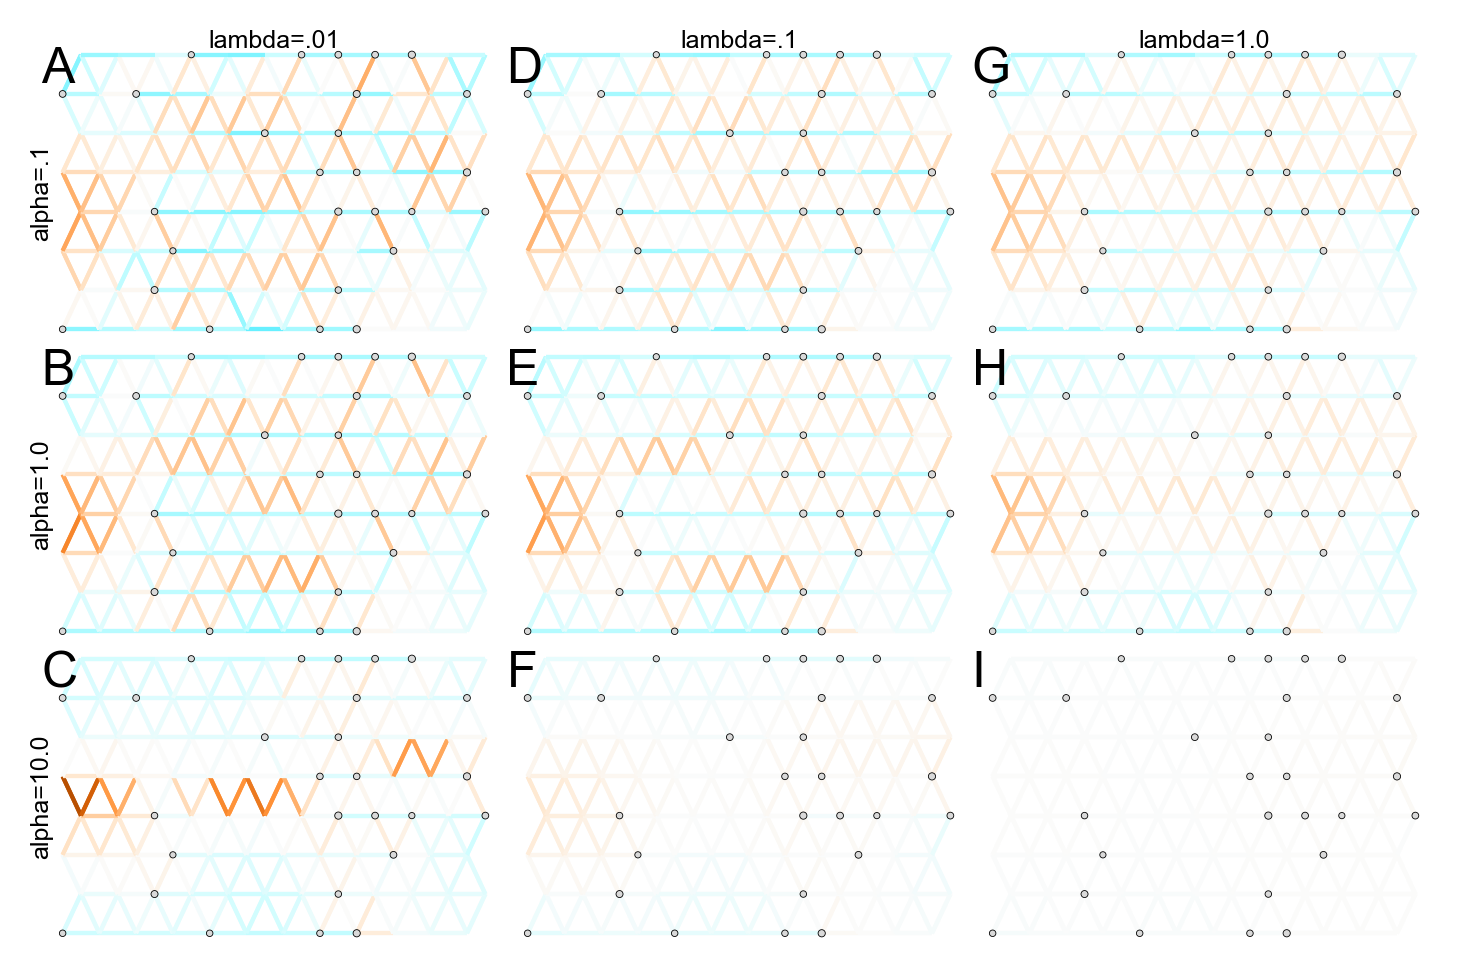

In [34]:
%%time
title_loc = "left"
title_pad = "-10"
title_fontsize = 12

# setup figure
fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(
    ncols=3, nrows=3, figure=fig, wspace=0.0, hspace=0.0
)

rep = 0

ax_00 = fig.add_subplot(spec[0, 0])
ax_00.set_title("A", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_00.text(.5, 1.0, "lambda=.01", horizontalalignment="center", verticalalignment="center", transform=ax_00.transAxes, fontsize=6)
ax_00.text(0, .5, "alpha=.1", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_00.transAxes, fontsize=6)
fit_and_plot_simulation(ax_00, "ibdaniso", "missingatrandom", rep, .1, .01)

ax_01 = fig.add_subplot(spec[0, 1])
ax_01.set_title("D", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_01.text(.5, 1.0, "lambda=.1", horizontalalignment="center", verticalalignment="center", transform=ax_01.transAxes, fontsize=6)
fit_and_plot_simulation(ax_01, "ibdaniso", "missingatrandom", rep, .1, .1)

ax_02 = fig.add_subplot(spec[0, 2])
ax_02.set_title("G", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_02.text(.5, 1.0, "lambda=1.0", horizontalalignment="center", verticalalignment="center", transform=ax_02.transAxes, fontsize=6)
fit_and_plot_simulation(ax_02, "ibdaniso", "missingatrandom", rep, .1, 1.)

ax_10 = fig.add_subplot(spec[1, 0])
ax_10.set_title("B", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_10.text(0, .5, "alpha=1.0", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_10.transAxes, fontsize=6)
fit_and_plot_simulation(ax_10, "ibdaniso", "missingatrandom", rep, 1., .01)

ax_11 = fig.add_subplot(spec[1, 1])
ax_11.set_title("E", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_11, "ibdaniso", "missingatrandom", rep, 1., .1)

ax_12 = fig.add_subplot(spec[1, 2])
ax_12.set_title("H", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_12, "ibdaniso", "missingatrandom", rep, 1., 1.)

ax_20 = fig.add_subplot(spec[2, 0])
ax_20.set_title("C", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
ax_20.text(0, .5, "alpha=10.0", horizontalalignment="center", verticalalignment="center", rotation=90, transform=ax_20.transAxes, fontsize=6)
fit_and_plot_simulation(ax_20, "ibdaniso", "missingatrandom", rep, 10., .01)

ax_21 = fig.add_subplot(spec[2, 1])
ax_21.set_title("F", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_21, "ibdaniso", "missingatrandom", rep, 10., .1)

ax_22 = fig.add_subplot(spec[2, 2])
ax_22.set_title("I", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
fit_and_plot_simulation(ax_22, "ibdaniso", "missingatrandom", rep, 10., 1.)

In [35]:
fig.savefig(
    "../output/figures/supp-figure-4-alpha-lambda-sim-aniso.pdf", bbox_inches="tight"
)